# Polynomial Regression using Scikit-Learn

Polynomial regression models the relationship between the independent variable (X) and the dependent variable (y) as an nth-degree polynomial. Unlike linear regression, which fits a straight line, polynomial regression can fit curves by including higher-order terms (e.g., x², x³). This allows the model to capture complex patterns in the data.

## Key Concepts

### Validation Curve Calculation
- Uses `validation_curve` to compute training and validation scores for polynomial regression models of varying degrees (0 to 20).
- `PolynomialRegression()` is a pipeline that fits polynomial features and a regression model.
- `train_score` and `val_score` store cross-validated scores for each degree.

### Plotting Scores
- Plots the median training score (blue) and validation score (red) for each polynomial degree.
- Visualizes overfitting and underfitting as model complexity increases.

### Model Selection and Visualization
- Selects degree 3 (the first maximum of the validation curve) for the polynomial regression model.
- Fits the model to the data and predicts on test data.
- Plots the original data points and the fitted curve for degree 3.

### Final Visualization
- Displays the plot with training/validation scores and the fitted polynomial curve.
- Helps choose the best polynomial degree by balancing bias and variance, while visualizing the model selection and final fit.


In [ ]:

# Python, Ch 39, Hyperparameters and Model Validation 
# Saviz
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_model = model.predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model) # 1.0
# it trains and evaluates the model on the same data!


1.0

In [2]:

# Model Validation the Right Way
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)
# fit the model on one set of data
model.fit(X1, y1)
# evaluate the model on the second set of data with one-nearest-neighbor classifier
y2_model = model.predict(X2)
accuracy_score(y2, y2_model) # 0.9066666666666666



0.9066666666666666

In [3]:


# Model Validation via Cross-Validation
# two-fold cross-validation, that is, one in which we have split
# the data into two sets and used each in turn as a validation set
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model) 
# (0.96, 0.9066666666666666)


(0.96, 0.9066666666666666)

In [4]:

# split the data into five groups and use each in turn to evaluate the model fit on the other four-fifths of the data
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5) 
# array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1. ])
# Repeating the validation across different subsets of the data gives us an even better idea of the performance of the algorithm
# we have 150 samples, the leave-one-out cross-validation yields scores for 150 trials, and each score indicates either a successful (1.0) or an unsuccessful (0.0) prediction
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores
scores.mean() # 0.96


np.float64(0.96)

/opt/anaconda3/envs/schedulingenv/lib/python3.10/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/schedulingenv/lib/python3.10/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/schedulingenv/lib/python3.10/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/schedulingenv/lib/python3.10/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/schedulingenv/lib/python3.10/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/schedulingenv/lib/python3.10/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


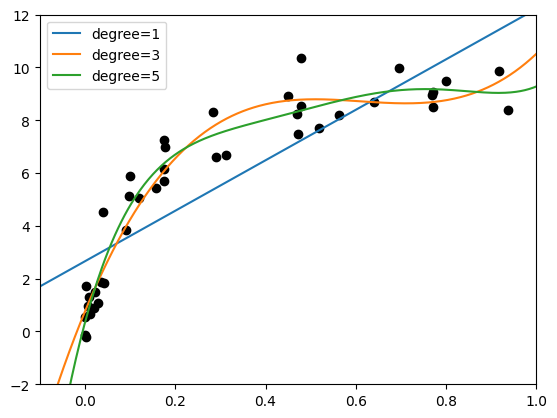

In [6]:

# Selecting the Best Model
# Validation Curves in Scikit-Learn for polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
 return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))




import numpy as np
def make_data(N, err=1.0, rseed=1):
  rng = np.random.RandomState(rseed)
  X = rng.rand(N, 1) ** 2
  y = 10 - 1. / (X.ravel() + 0.1)
  if err > 0:
   y += err * rng.randn(N)
  return X, y



X, y = make_data(40)
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
  y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
  plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))




plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');
plt.show()


/opt/anaconda3/envs/schedulingenv/lib/python3.10/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/schedulingenv/lib/python3.10/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/schedulingenv/lib/python3.10/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


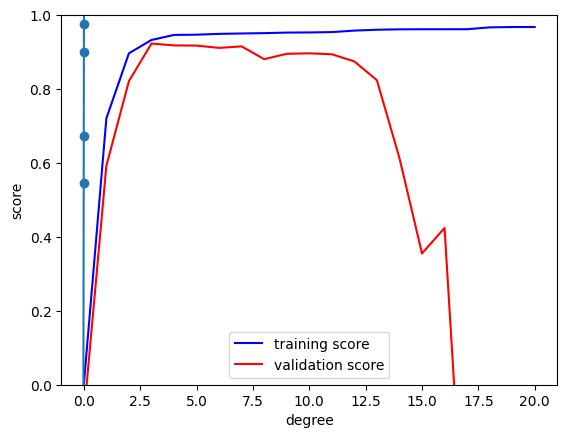

In [7]:

# compute and plotting both the training score and the validation score across the range
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, param_name='polynomialfeatures__degree', param_range=degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');
# Select polynomial degree 3 of first maximum of validation curve
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);
plt.show()
